<a href="https://colab.research.google.com/github/rchang18/MAT-241/blob/main/Module_B_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

17.1 Interpolation Problem Statement

If we have a data set where for every independent X variable there is a distinct and dependent Y variable, then a function can be created. Using this function an unknown Y variable can be calculated for a given X value. Take a look at the graph below.

Text(0.5, 0, 'X Axis')

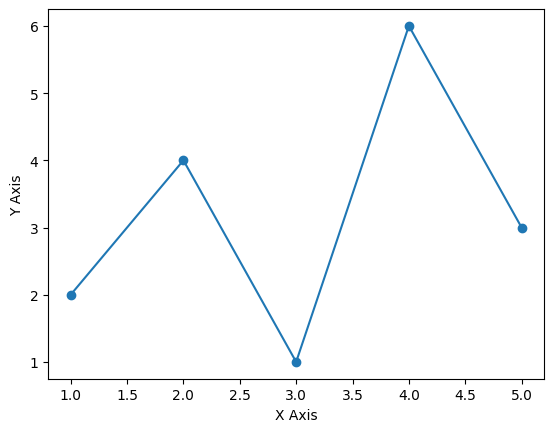

In [4]:
import matplotlib.pyplot as plt
x = [1,2,3,4,5]
y = [2,4,1,6,3]
plt.plot(x, y,'-o')
plt.ylabel('Y Axis')
plt.xlabel('X Axis')

Assuming we created this function using known points (marked by dots), we could now interpolate to find a corresponding Y value for an unknown X value at say 2.5.

17.2 Linear Interpolation

The equation for actually interpolating for an unknown value using known values is: 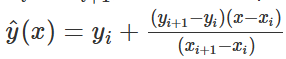. Where X is the value the function is being evaluated at and Xi < X < Xi+1.

Using the graph from above, we can interpolate using the interp1d script in python. Say we want to find the value at 2.5. interp1d will use the equation for interpolating and find the corresponding Y value.

In [10]:
from scipy.interpolate import interp1d
x = [1,2,3,4,5]
y = [2,4,1,6,3]
f = interp1d(x,y)
Yhat = f(2.5); print(Yhat)

2.5


17.3 Cubic Spline Interpolation

Cubic spline interpolation is composed of piecewise functions where certain points are connected by a cubic polynomial. This polynomial looks something like aX^3 + bX^2 + cX + d. The graph below shows what a piecewise function would look like.

Text(0.5, 0, 'X Axis')

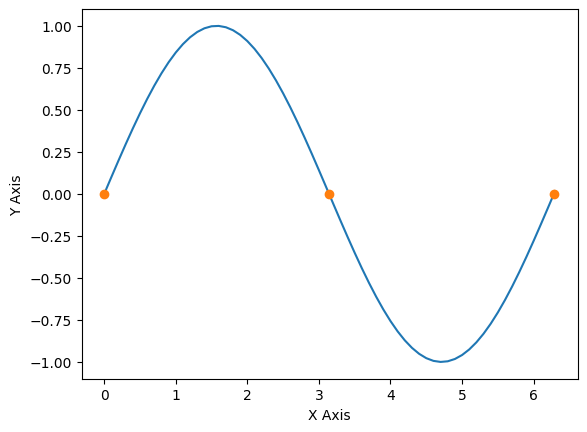

In [38]:
import numpy as np
x = np.arange(0, 2.01*(np.pi), 0.1)
y = np.sin(x)
plt.plot(x, y,)
plt.plot([0,(np.pi),2*(np.pi)],[0,0,0],'o')
plt.ylabel('Y Axis')
plt.xlabel('X Axis')

Before interpolating the cubic functions have to be defined. For any number of points, there is one less function to find. For example if there are 3 data points then 2 functions have to be defined and for each function there are 4 coefficients to be defined.

The splines can be defined using the following:


1.   The cubic function intersects the data points.
2.   The cubic function joins smoothly with it's neighbors

We can define the cubic function using the above information. The cubic function is equal to the known Y values where it intersects the data points. The cubic functions that meet at a data point have equal first and second derivatives. In order to have enough equations to solve for all of the unknown coefficients, it is also arbitrarily assumed that the second derivatives are zero at the endpoints.

Let's do an example.



Text(0, 0.5, 'y')

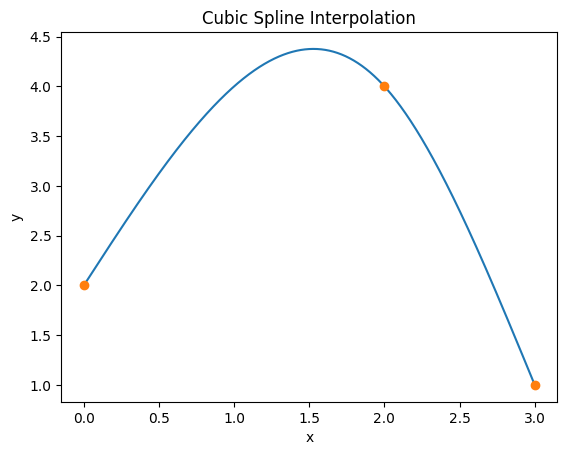

In [40]:
from scipy.interpolate import CubicSpline
x = [0,2,3]
y = [2,4,1]
f = CubicSpline(x, y, bc_type='natural')
x_new = np.linspace(0, 3, 1000)
y_new = f(x_new)
plt.plot(x_new, y_new)
plt.plot(x, y, 'o')
plt.title('Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')

The code above plots the cubic functions for the given data points using the assumptions and definitions of the splines. Python can also be used to solve explicitly for the coefficients using matrices.